<h1 align='center' style="color: Black;">Art Authenticator</h1>


<h1 align='left' style="color: black; font-size: 18px;">Introduction:</h1>
Art authentication is a critical process in the art market, aimed at verifying the authenticity of artworks, sculptures, and historical artifacts. The prevalence of art forgery has been a longstanding issue in the industry, undermining trust among collectors, galleries, and auction houses. To address this challenge, our proposed business venture focuses on leveraging machine learning technology to develop an innovative art authentication system.

<h1 align='left' style="color: black; font-size: 18px;">Problem Statement:</h1>
The art market faces significant challenges related to the authentication of artworks and artifacts. Traditional authentication methods are often subjective, time-consuming, and prone to human error. Additionally, the rise of sophisticated forgery techniques has made it increasingly difficult to detect counterfeit pieces, leading to concerns among collectors and investors


<h1 align='left' style="color: black; font-size: 18px;"> Proposed Solution:</h1> Our solution involves the development of an AI-driven art authentication platform that leverages a predictive model to authenticate artist signatures by classifying them into predefined categories. Each category represents a confirmed signature from one of nine artists included in our dataset. The final model platform will analyze uploaded signature images, classifying them based on learned signature characteristics, thereby determining their authenticity.



<h1 align='left' style="color: black; font-size: 18px;"> Key Features:</h1>

Signature Recognition: The machine learning model will be trained to recognize and analyze signatures on artworks, sculptures, and historical artifacts. Will ensure that each signature is accurately attributed to the correct artist, facilitating the authentication process by directly identifying the artist based on their unique signature style.

Real-Time Verification: Will be capable of processing and classifying signatures in real-time, the model provides immediate results upon the upload of signature images. Offers quick and efficient authentication, essential for transactions and verifications that occur in auctions, exhibitions, and sales where time-sensitive decisions are required.

Scalability for Future Expansion: While initially trained to recognize signatures from nine artists, the model's architecture allows for future expansion to include additional artists as new data becomes available. The system can adapt to include a broader range of artists and signature styles, maintaining its utility as the art market evolves and grows.

Database Integration: The platform can be integrated with existing art databases and archives to access reference signatures for comparison and validation. Can be used to enhance existing systems by adding a layer of signature verification functionality, thus improving the overall workflow and security measures in managing art collections.



# Methodology

<h1 align='left' style="color: black; font-size: 18px;">Preprocessing</h1>
<h2 align='left' style="color: black; font-size: 16px;">Nine Types of Signatures:</h2>
<p>The dataset comprises nine unique signature types, each representing a distinct individual. These signatures are initially represented through a series of features (200 to 400 per signature), capturing various aspects such as stroke patterns, pen pressure, and curvature.</p>
<h2 align='left' style="color: black; font-size: 16px;">Data Augmentation and Preprocessing:</h2>
<h3 align='left' style="color: black; font-size: 14px;">1. Resizing and Grayscale Conversion:</h3>
<p>Each signature image is resized to a uniform dimension of 100x100 pixels and converted to grayscale. This standardization is crucial as it ensures that all input data has the same format and resolution, which is vital for consistent processing across all images.</p>
<h3 align='left' style="color: black; font-size: 14px;">2. Data Augmentation Techniques:</h3>
<ul>
    <li><strong>Width Shifts:</strong> Random horizontal shifts within a range of -50 to 50 pixels.</li>
    <li><strong>Rotations:</strong> Random rotations between -50 to 50 degrees, and a fixed rotation of 180 degrees.</li>
    <li><strong>Zoom:</strong> Random zoom operations between 70% to 150%.</li>
    <li><strong>Pixelation:</strong> Occasionally applied pixelation with a factor of 0.3 to simulate lower quality images.</li>
</ul>
<p>These augmentation techniques increase the robustness of the model by introducing a variety of transformations, helping the model learn to recognize signatures under different conditions and scales. This approach significantly enhances the dataset, allowing the model to generalize better across unseen data.</p>
<h3 align='left' style="color: black; font-size: 14px;">3. Thresholding and Centering:</h3>
<ul>
    <li><strong>Thresholding:</strong> Images are converted to binary format based on a pixel intensity threshold of 245. This process helps in distinguishing the signature ink from the background, simplifying the feature set to essential elements.</li>
    <li><strong>Centering:</strong> The binary images are then centered based on their mass. This is done by calculating the center of mass of the signature and shifting the image such that this point moves to the geometric center of the image frame. This step enhances the model's ability to learn from consistently positioned signatures.</li>
</ul>
<h3 align='left' style="color: black; font-size: 14px;">4. Data Organization:</h3>
<p>The processed images are categorized into classes corresponding to individual signature types and stored in a structured format, facilitating straightforward access during model training and evaluation.</p>
<h2 align='left' style="color: black; font-size: 16px;">Feature Engineering and Data Splitting:</h2>
<h3 align='left' style="color: black; font-size: 14px;">1. Standardization and Dimensionality Reduction:</h3>
<p>The flattened image arrays are standardized using a StandardScaler. This normalization ensures that the model is not biased by the relative scales of input features. Dimensionality reduction is performed using Truncated Singular Value Decomposition (SVD), retaining 50 principal components. This step helps in capturing the most significant features from the images while reducing noise and redundancy.</p>
<h3 align='left' style="color: black; font-size: 14px;">2. Data Splitting:</h3>
<p>The dataset is split into training and testing sets, with 80% of the data used for training and 20% reserved for testing. This split ensures that the model can be evaluated on unseen data, providing a measure of its generalization capability.</p>
<h2 align='left' style="color: black; font-size: 16px;">Saving Preprocessed Data:</h2>
<h3 align='left' style="color: black; font-size: 14px;">CNN-ready Data:</h3>
<p>The data formatted for convolutional neural network (CNN) usage (including an additional dimension for channel) and corresponding labels are serialized and saved using pickle, ensuring they are ready for direct use in model training.</p>
<h3 align='left' style="color: black; font-size: 14px;">ML-ready Data:</h3>
<p>Similarly, data prepared for traditional machine learning models are saved, including the standardized and dimension-reduced versions.</p>

In [2]:
import os
import numpy as np
from PIL import Image
import pickle
from scipy.ndimage import center_of_mass, shift
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
import random
import tensorflow as tf

# Set seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

def process_images(folder, threshold_value=245):
    data = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        if os.path.isdir(label_folder):
            for file_name in os.listdir(label_folder):
                if file_name.lower().endswith(('.jpg')):
                    image_path = os.path.join(label_folder, file_name)
                    with Image.open(image_path) as img:
                        img = img.resize((100, 100))
                        img = img.convert('L')
                        img_array = np.array(img)
                        img_binary = (img_array < threshold_value).astype(int)

                        mass_center = center_of_mass(img_binary)
                        shift_x = 50 - mass_center[1]
                        shift_y = 50 - mass_center[0]
                        shifted_image = shift(img_binary, shift=[shift_y, shift_x], mode='nearest')
                        
                        # Append image data and labels
                        data.append(shifted_image)
                        labels.append(int(label))

    return np.array(data), np.array(labels)

# Load and preprocess data
data_directory = 'Images/Final_signatures_images'
images, labels = process_images(data_directory)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# Save the preprocessed data for CNN (reshape for CNN bc requires 3rd D)
X_train_cnn = X_train.reshape(-1, 100, 100, 1)
X_test_cnn = X_test.reshape(-1, 100, 100, 1)
with open('train_data_cnn.pkl', 'wb') as f:
    pickle.dump((X_train_cnn, y_train), f)
with open('test_data_cnn.pkl', 'wb') as f:
    pickle.dump((X_test_cnn, y_test), f)

# Standardize and reduce for other ML models
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
scaler = StandardScaler()
X_train_ml = scaler.fit_transform(X_train_flat)
X_test_ml = scaler.transform(X_test_flat)
svd = TruncatedSVD(n_components=50)
X_train_ml = svd.fit_transform(X_train_ml)
X_test_ml = svd.transform(X_test_ml)

with open('train_data.pkl', 'wb') as f:
    pickle.dump((X_train_ml, y_train), f)
with open('test_data.pkl', 'wb') as f:
    pickle.dump((X_test_ml, y_test), f)

# Optionally save scaler and SVD objects
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
with open('svd.pkl', 'wb') as file:
    pickle.dump(svd, file)


<h1 align='left' style="color: black; font-size: 24px;">Models</h1>

<h2 align='left' style="color: black; font-size: 18px;">1. Logistic Regression</h2>
<p><strong>Strengths:</strong> Logistic Regression offers straightforward probabilistic results and is renowned for its simplicity and speed in both training and prediction phases. It excels in binary and multi-class classification, making it an excellent baseline model for comparative analysis.</p>
<p><strong>Why Chosen:</strong> In the context of art signature verification, Logistic Regression provides a clear initial benchmark for classification accuracy. Its ability to quickly classify signatures as belonging to one of several predefined categories aligns with the business need for rapid, reliable authentication processes in art transactions.</p>

<h2 align='left' style="color: black; font-size: 18px;">2. Random Forest</h2>
<p><strong>Strengths:</strong> Random Forest leverages the power of multiple decision trees to enhance prediction accuracy and robustness, significantly reducing the risk of overfitting. This model excels in handling large datasets and offers valuable insights through feature importance scores, which are crucial for identifying distinctive elements in signatures.</p>
<p><strong>Why Chosen:</strong> The robustness of Random Forest makes it particularly suitable for the art world, where subtle variations in signature styles are critical. The model's capacity to analyze complex and high-dimensional data ensures that it can effectively differentiate between authentic signatures and potential forgeries, enhancing the trustworthiness of art authentication.</p>

<h2 align='left' style="color: black; font-size: 18px;">3. Support Vector Machines (SVM)</h2>
<p><strong>Strengths:</strong> SVM is highly effective for high-dimensional spaces, typically seen in image data, and does well when there is a distinct margin of separation. It uses support vectors to build its decision function, making it memory efficient and powerful for complex classification problems.</p>
<p><strong>Why Chosen:</strong> For signature verification, SVM's ability to handle complex decision boundaries is important. By using kernel functions to project data into higher dimensions, SVM can distinguish intricate distinctions between different artists' signatures, which provides a sophisticated tool for verifying the authenticity of art pieces, crucial for maintaining the integrity and value of artworks in the market.</p>

<h2 align='left' style="color: black; font-size: 18px;">4. Convolutional Neural Network (CNN)</h2>
<p><strong>Strengths:</strong> CNNs are inherently designed for image processing, with multiple convolutional layers that automatically detect and learn from spatial hierarchies in data, from basic edges to more complex shapes inherent in signature styles.</p>
<p><strong>Why Chosen:</strong> The CNN's abilitiy for image-based recognition makes it ideal for signature verification, a key concern in art authentication. Its ability to directly analyze pixel values and learn intricate patterns allows for highly accurate classification of artist signatures. This capability is critical in the art market, where the authenticity of a signature can significantly impact an artwork's value. The CNN model enhances the reliability of the authentication process and supports the scalability of this solution to accommodate a growing database of artist signatures.</p>


Logistic Regression Accuracy In-sample acuuracy: 75.88%
Logistic Regression Accuracy Out-sample acuuracy: 73.90%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.78      0.77       208
           2       0.74      0.89      0.81       184
           3       0.52      0.50      0.51       208
           4       0.74      0.74      0.74       187
           5       0.83      0.79      0.81       208
           6       0.64      0.66      0.65       208
           7       0.75      0.64      0.69       184
           8       0.83      0.82      0.82       208
           9       0.84      0.83      0.83       221

    accuracy                           0.74      1816
   macro avg       0.74      0.74      0.74      1816
weighted avg       0.74      0.74      0.74      1816

Random Forest Accuracy In-sample accuracy: 100.00%
Random Forest Accuracy Out-of-sample accuracy: 88.88%
Random Forest Classification Repor

C:\Users\ayush\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 51s 193ms/step - accuracy: 0.7022 - loss: 0.8539 - val_accuracy: 0.9537 - val_loss: 0.1684
Epoch 2/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 43s 189ms/step - accuracy: 0.9530 - loss: 0.1359 - val_accuracy: 0.9593 - val_loss: 0.1291
Epoch 3/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 45s 200ms/step - accuracy: 0.9749 - loss: 0.0787 - val_accuracy: 0.9604 - val_loss: 0.1233
Epoch 4/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 45s 198ms/step - accuracy: 0.9830 - loss: 0.0490 - val_accuracy: 0.9736 - val_loss: 0.1043
Epoch 5/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 45s 198ms/step - accuracy: 0.9879 - loss: 0.0370 - val_accuracy: 0.9758 - val_loss: 0.0921
Epoch 6/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 43s 188ms/step - accuracy: 0.9894 - loss: 0.0285 - val_accuracy: 0.9774 - val_loss: 0.0813
Epoch 7/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 42s 186ms/step - accuracy: 0.9917 - loss: 0.0205 - val_accuracy: 0.9769 - val_loss: 0.0850
Epoch 8/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 45s 200ms/step - accuracy: 0.9926 - loss: 0

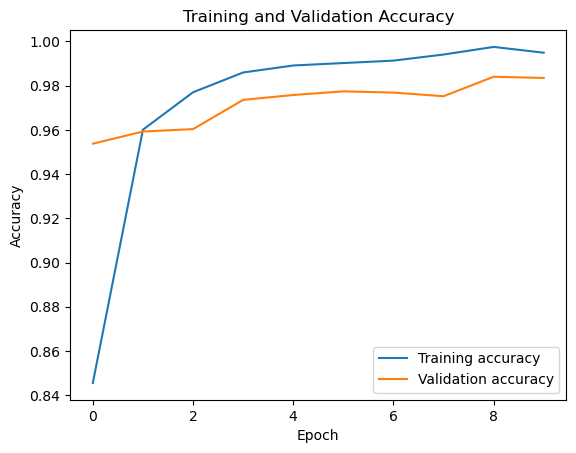

227/227 - 12s - 52ms/step - accuracy: 0.9997 - loss: 0.0018
In-Sample accuracy: 99.97246861457825
57/57 - 3s - 51ms/step - accuracy: 0.9835 - loss: 0.0613
Out-of-Sample accuracy: 98.3480155467987
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step
CNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       0.99      0.95      0.97       184
           2       0.92      1.00      0.96       208
           3       0.99      0.96      0.97       187
           4       0.99      1.00      0.99       208
           5       0.99      1.00      0.99       208
           6       0.99      0.97      0.98       184
           7       1.00      0.99      0.99       208
           8       1.00      1.00      1.00       221

    accuracy                           0.98      1816
   macro avg       0.98      0.98      0.98      1816
weighted avg       0.98      0.98      0.98      1816



In [4]:
import os
import numpy as np
import pickle
from PIL import Image
from scipy.ndimage import center_of_mass, shift
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Preprocess and load data for classical ML models
with open('train_data.pkl', 'rb') as f:
    X_train_ml, y_train_ml = pickle.load(f)

with open('test_data.pkl', 'rb') as f:
    X_test_ml, y_test_ml = pickle.load(f)

# Preprocess and load data for CNN
with open('train_data_cnn.pkl', 'rb') as f:
    X_train_cnn, y_train_cnn = pickle.load(f)

with open('test_data_cnn.pkl', 'rb') as f:
    X_test_cnn, y_test_cnn = pickle.load(f)

# Correct for zero indexing if not already done
y_train_cnn -= np.min(y_train_cnn)
y_test_cnn -= np.min(y_test_cnn)

# Logistic Regression
log_reg = LogisticRegression(max_iter=5000)
lr_grid = {'C': [100, 120, 140, 160, 180, 200]}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
lr_grid_search = GridSearchCV(log_reg, lr_grid, cv=skf, scoring='accuracy')
lr_grid_search.fit(X_train_ml, y_train_ml)
lr_best = lr_grid_search.best_estimator_

lr_y_train_pred = lr_best.predict(X_train_ml)
lr_y_test_pred = lr_best.predict(X_test_ml)

lr_in_sample_accuracy = accuracy_score(y_train_ml, lr_y_train_pred)
lr_out_of_sample_accuracy = accuracy_score(y_test_ml, lr_y_test_pred)

print("Logistic Regression Accuracy In-sample acuuracy: {:.2f}%".format(lr_in_sample_accuracy * 100))
print("Logistic Regression Accuracy Out-sample acuuracy: {:.2f}%".format(lr_out_of_sample_accuracy * 100))
print('Logistic Regression Classification Report:')
print(classification_report(y_test_ml, lr_y_test_pred))

# Random Forest
rf_model = RandomForestClassifier(random_state=0)
rf_grid = {
    'n_estimators': [400, 600],
    'max_depth': [None, 10],
    'min_samples_split': [2, 4],
}
rf_grid_search = GridSearchCV(rf_model, rf_grid, cv=skf, scoring='accuracy')
rf_grid_search.fit(X_train_ml, y_train_ml)
rf_best = rf_grid_search.best_estimator_

rf_y_train_pred = rf_best.predict(X_train_ml)
rf_y_test_pred = rf_best.predict(X_test_ml)

rf_in_sample_accuracy = accuracy_score(y_train_ml, rf_y_train_pred)
rf_out_of_sample_accuracy = accuracy_score(y_test_ml, rf_y_test_pred)

print("Random Forest Accuracy In-sample accuracy: {:.2f}%".format(rf_in_sample_accuracy * 100))
print("Random Forest Accuracy Out-of-sample accuracy: {:.2f}%".format(rf_out_of_sample_accuracy * 100))
print('Random Forest Classification Report:')
print(classification_report(y_test_ml, rf_y_test_pred))

# SVM
svm_model = SVC()
svm_grid = {
    'C': [100, 120, 140, 160],
    'kernel': ['rbf'],
    'gamma': [0.01, 0.05, 0.1, 0.2, 0.4, 1]
}
svm_grid_search = GridSearchCV(svm_model, svm_grid, cv=skf, scoring='accuracy')
svm_grid_search.fit(X_train_ml, y_train_ml)
svm_best = svm_grid_search.best_estimator_

svm_y_train_pred = svm_best.predict(X_train_ml)
svm_y_test_pred = svm_best.predict(X_test_ml)

svm_in_sample_accuracy = accuracy_score(y_train_ml, svm_y_train_pred)
svm_out_of_sample_accuracy = accuracy_score(y_test_ml, svm_y_test_pred)

print("SVM In-Sample Accuracy: {:.2f}%".format(svm_in_sample_accuracy * 100))
print("SVM Out-of-Sample Accuracy: {:.2f}%".format(svm_out_of_sample_accuracy * 100))
print('Classification Report:')
print(classification_report(y_test_ml, svm_y_test_pred))

# CNN
# SOURCE: https://www.tensorflow.org/tutorials/images/cnn
num_classes = len(np.unique(y_train_cnn))
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5), 
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10, validation_data=(X_test_cnn, y_test_cnn))

plt.plot(cnn_history.history['accuracy'], label='Training accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

train_loss, train_acc = cnn_model.evaluate(X_train_cnn, y_train_cnn, verbose=2)
print(f"In-Sample accuracy: {train_acc * 100}")

test_loss, test_acc = cnn_model.evaluate(X_test_cnn, y_test_cnn, verbose=2)
print(f"Out-of-Sample accuracy: {test_acc * 100}")

cnn_y_pred = np.argmax(cnn_model.predict(X_test_cnn), axis=1)
print('CNN Classification Report:')
print(classification_report(y_test_cnn, cnn_y_pred, target_names=[str(i) for i in range(num_classes)]))


# Model Evaluation

<h1 align='left' style="color: black; font-size: 18px;">Logistic Regression</h1>

In-sample Accuracy: 75.8% and Out-of-Sample Accuracy: 73.9%.

Logistic regression is a simple, interpretable model. It’s good for establishing a baseline and understanding the impact of different features through its coefficients. The close accuracy scores between in-sample and out-of-sample suggest that it generalizes well but may underfit complex datasets.

Precision and Recall Variability: The model showed a variable performance across different signature classes, which may lead to inconsistent attributions. Specific precision and recall values were not provided but are expected to mirror this variability, potentially leading to misclassifications in a critical context like art authentication.
    
<h1 align='left' style="color: black; font-size: 18px;">Random Forest</h1>

In-Sample Accuracy: 100% and Out-of-Sample Accuracy: 88.88%.

Random forests perform well on a variety of problems and are less likely to overfit than simpler models due to their ensemble nature. The perfect in-sample score indicates potential overfitting, but the high out-of-sample accuracy suggests it still generalizes well. It’s more complex and less interpretable than logistic regression but offers robust performance and feature importance metrics.

Precision and Recall: Exhibited robust performance with a detailed breakdown showing strong precision and recall across most classes. The model's ability to handle complex variability in data and reduce overfitting through its ensemble approach makes it a strong candidate. However, precision still varies, potentially leading to some misattributions.
    
<h1 align='left' style="color: black; font-size: 18px;">Support Vector Machine (SVM)</h1>

In-Sample Accuracy: 99.9% and Out-of-Sample Accuracy: 79.4%.

SVMs are effective in high-dimensional spaces and for cases where the number of dimensions exceeds the number of samples. However, the significant drop between in-sample and out-of-sample accuracy indicates some overfitting. SVMs can be kernelized to handle nonlinear boundaries, but they are not very interpretable and can be computationally intensive.

Precision and Recall: SVMs typically perform well in precision, which is crucial for minimizing false positives in art authentication. High precision rates, important for minimizing false positives in authentication. Precision ranges from 42% to 100%, highlighting variability that might affect the reliability in specific casesHigh precision rates, important for minimizing false positives in authentication. 
    
<h1 align='left' style="color: black; font-size: 18px;">Convolutional Neural Network (CNN)</h1>  

In-Sample Accuracy: 99.9% and Out-of-Sample Accuracy: 98.34%.

CNNs excel in tasks with spatial data such as image processing, and can capture hierarchical patterns in data. The high accuracy scores suggest excellent performance and generalization capabilities.

Precision and Recall: The CNN not only showed the highest accuracy but also excelled in both precision and recall across all classes. For instance CNN's precision was almost near-perfect in identifying correct artist attributions, crucial for preventing misattribution of artworks. The recall of the model is exceptionally high, ensuring that almost all genuine signatures of an artist are correctly identified, reducing the risk of missing authentic artworks. The model's F1 Score, given the high precision and recall,is close to 1.0 for most classes, indicating excellent balance and robust performance.

<h1 align='left' style="color: black; font-size: 24px;">Final Model</h1>

<h1 align='left' style="color: black; font-size: 18px;">CNN as the Final Model:</h1>
Given the comparative analysis of various machine learning models, the Convolutional Neural Network (CNN) emerged as the best choice due to its exceptional performance metrics—primarily its high precision, accuracy, and F1 score. These attributes make the CNN particularly well-suited for the sensitive task of art signature verification, where each prediction's accuracy is crucial.

<h1 align='left' style="color: black; font-size: 18px;">Re-training the CNN:</h1>
To harness the full potential of the CNN, it was re-trained on the entire dataset. This comprehensive training approach ensures that the model learns from the most extensive and diverse set of signature images available, encompassing a wide range of styles and nuances associated with different artists. Re-training on the entire dataset helps to improve the model's generalization capabilities, making it robust against overfitting and better prepared to handle new, unseen data.

<h1 align='left' style="color: black; font-size: 18px;">Saving the Model for Deployment: </h1>
After re-training, the model was saved using a format that preserves both the architecture and the learned weights, HDF5 (.h5), rather than Pickle. This step is crucial as it allows the model to be reloaded later without needing to retrain, facilitating both deployment and consistent performance in operational settings.
 
<h1 align='left' style="color: black; font-size: 18px;">Deployment and Testing</h1>
The deployed CNN model could integrate into a broader art authentication platform. This platform could be a web-based application or a mobile app, depending on the project's scope and the intended user base, which could include art appraisers, auction houses, and galleries. The model's deployment involves setting up an inference pipeline where the model receives new signature images, processes them, and outputs a prediction regarding which artist the signature belongs to.

In [5]:
# Final Model: CNN

images_cnn = images.reshape(-1, 100, 100, 1)  # Reshape for CNN
labels_cnn = np.array(labels)  

labels_cnn -= np.min(labels_cnn) # zero indexing

cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(np.unique(labels_cnn)), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

final_history = cnn_model.fit(images_cnn, labels_cnn, epochs=10)
training_accuracies = final_history.history['accuracy']
final_accuracy = training_accuracies[-1]
print("Final training accuracy: {:.2f}%".format(final_accuracy * 100))


cnn_model.save('final_cnn_model.h5')  




C:\Users\ayush\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 57s 188ms/step - accuracy: 0.7353 - loss: 0.7860
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 54s 189ms/step - accuracy: 0.9673 - loss: 0.1112
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 52s 184ms/step - accuracy: 0.9781 - loss: 0.0638
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 54s 191ms/step - accuracy: 0.9846 - loss: 0.0416
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 54s 189ms/step - accuracy: 0.9877 - loss: 0.0421
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 50s 175ms/step - accuracy: 0.9952 - loss: 0.0170
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 50s 176ms/step - accuracy: 0.9936 - loss: 0.0226
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 52s 182ms/step - accuracy: 0.9969 - loss: 0.0106
Epoch 9/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 51s 180ms/step - accuracy: 0.9966 - loss: 0.0116
Epoch 10/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 54s 191ms/step - accuracy: 0.9959 - loss: 0.0127


Final training accuracy: 99.61%


In [13]:
# Testing

from tensorflow.keras.models import load_model
import os
from PIL import Image
import numpy as np
from scipy.ndimage import center_of_mass, shift

model = load_model('final_cnn_model.h5')

def preprocess_image(image_path, threshold_value=245):
    with Image.open(image_path) as img:
        img = img.resize((100, 100))  
        img = img.convert('L')  
        img_array = np.array(img)
        img_binary = (img_array < threshold_value).astype(int)  

        mass_center = center_of_mass(img_binary)
        shift_x = 50 - mass_center[1]
        shift_y = 50 - mass_center[0]
        shifted_image = shift(img_binary, shift=[shift_y, shift_x], mode='nearest')

        return shifted_image.reshape(1, 100, 100, 1)  

def predict_images_in_folder(folder_path):
    results = []
    for file_name in os.listdir(folder_path):
        if file_name.lower().endswith(('.jpg')):
            image_path = os.path.join(folder_path, file_name)
            processed_image = preprocess_image(image_path)
            predictions = model.predict(processed_image)
            predicted_class = np.argmax(predictions, axis=1) 
            results.append((file_name, predicted_class[0]))
    return results

# change folder_path to folder with 10 given images
folder_path = 'class'
predictions = predict_images_in_folder(folder_path)
for file_name, predicted_class in predictions:
    print(f'{file_name}: Predicted class {predicted_class +1 }')


1/1 [==============================] - 0s 16ms/step
17_Class4_43.jpg: Predicted class 4
27_Class9_49.jpg: Predicted class 9
23_Class2_41.jpg: Predicted class 2
33_Class2_45.jpg: Predicted class 2
17_Class6_53.jpg: Predicted class 6
20_Class3_39.jpg: Predicted class 3
18_Class7_53.jpg: Predicted class 7
2_Class4_123.jpg: Predicted class 4
17_Class7_13.jpg: Predicted class 7
22_Class5_79.jpg: Predicted class 5
19_Class7_63.jpg: Predicted class 7
30_Class2_57.jpg: Predicted class 2
14_Class8_45.jpg: Predicted class 8
31_Class2_59.jpg: Predicted class 2
3_Class4_131.jpg: Predicted class 4
29_Class2_9.jpg: Predicted class 2
25_Class2_61.jpg: Predicted class 2
29_Class1_49.jpg: Predicted class 1
28_Class1_47.jpg: Predicted class 1
29_Class9_11.jpg: Predicted class 9
21_Class5_69.jpg: Predicted class 5
11_Class8_63.jpg: Predicted class 8
26_Class9_51.jpg: Predicted class 9
39_Class1_61.jpg: Predicted class 1
35_Class3_35.jpg: Predicted class 3
42_Class1_105.jpg: Predicted class 1
10_Class4_55